<a href="https://colab.research.google.com/github/Kathysita/Curvasdeluz/blob/main/curvas_de_luz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curvas de luz
Para la realización de este documento se utlizaron los datasets y el codigo de la siguiente pagina: [Kepler & TESS Exoplanet Data🌌🌌🌌](https://https://www.kaggle.com/datasets/vijayveersingh/kepler-and-tess-exoplanet-data/data)

Los datasets se subieron a un repositorio publico en Github, el cual puede ser encontrado en el siguiente [enlace](https://github.com/Kathysita/Curvasdeluz)

In [ ]:
!git clone https://github.com/Kathysita/Curvasdeluz.git
%cd Curvasdeluz


Cloning into 'Curvasdeluz'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 29 (delta 5), reused 11 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 6.05 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Filtering content: 100% (7/7), 84.30 MiB | 30.83 MiB/s, done.
/content/Curvasdeluz


In [ ]:
!pip install lightkurve --quiet #Instala las librerias necesarias para despues poder importar LightKurve.

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec=

In [ ]:
import numpy as np # Algebra lineal y otros calculos matematicos
import pandas as pd # procesar datos de csv, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Para crear gráficos y otras visualizaciones
import seaborn as sns # Para crear graficos mas esteticos y estadisticos
import warnings    # Permite controlar los mensajes de advertencia

import lightkurve as lk # Sirve para analizar curvas de luz y datos astronomicos
warnings.filterwarnings("ignore") # Oculta los mensajes de warnings para que la consola no se sature.

/usr/local/lib/python3.12/dist-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [ ]:
#Las siguientes lineas de código son para visualizar los datos de una forma mas general.

kepler_stellar = pd.read_csv("/content/Curvasdeluz/keplerstellar_2025.02.03_04.41.47.csv", skiprows=1, delimiter=",", comment="#")
stellar_hosts = pd.read_csv("/content/Curvasdeluz/STELLARHOSTS_2025.02.03_06.11.17.csv", skiprows=1, delimiter=",", comment="#")
koi_table = pd.read_csv("/content/Curvasdeluz/q1_q8_koi_2025.02.03_04.12.15.csv", skiprows=1, delimiter=",", comment="#")
tce_table = pd.read_csv("/content/Curvasdeluz/q1_q17_dr25_tce_2025.02.03_04.32.18.csv", skiprows=1, delimiter=",", comment="#")
ps_table = pd.read_csv("/content/Curvasdeluz/PS_2025.02.03_05.09.36.csv", skiprows=1, delimiter=",", comment="#")
fpp_table = pd.read_csv("/content/Curvasdeluz/q1_q17_dr25_koifpp_2025.02.03_06.14.34.csv", skiprows=1, delimiter=",", comment="#")
toi_table = pd.read_csv("/content/Curvasdeluz/TOI_2025.02.03_06.18.31.csv", skiprows=1, delimiter=",", comment="#")

# --- Data Overview ---
print("Kepler Stellar Data:")
print(kepler_stellar.info())
print(kepler_stellar.describe())

print("\nStellar Hosts Data:")
print(stellar_hosts.info())
print(stellar_hosts.describe())

print("\nKOI Data:")
print(koi_table.info())
print(koi_table.describe())

print("\nTCE Data:")
print(tce_table.info())
print(tce_table.describe())

print("\nPS Data (Confirmed Planets):")
print(ps_table.info())
print(ps_table.describe())

print("\nFPP Data:")
print(fpp_table.info())
print(fpp_table.describe())

print("\nTOI Data:")
print(toi_table.info())
print(toi_table.describe())

Kepler Stellar Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53462 entries, 0 to 53461
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   st_delivname    53462 non-null  object 
 1   kepid           53462 non-null  int64  
 2   tm_designation  53389 non-null  object 
 3   ra              53462 non-null  float64
 4   dec             53462 non-null  float64
 5   kepmag          53454 non-null  float64
 6   teff            53462 non-null  int64  
 7   teff_err1       50985 non-null  float64
 8   teff_err2       50965 non-null  float64
 9   teff_prov       53462 non-null  object 
 10  logg            53462 non-null  float64
 11  logg_err1       50985 non-null  float64
 12  logg_err2       50985 non-null  float64
 13  logg_prov       53462 non-null  object 
 14  feh             53462 non-null  float64
 15  feh_err1        50985 non-null  float64
 16  feh_err2        50985 non-null  float64
 17  feh_prov  

In [ ]:
koi_table.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,9388479,K00936.02,Kepler-732 c,CONFIRMED,CANDIDATE,NaN,NaN,NaN,NaN,NaN,...,-200.0,4.76,0.3,-0.3,0.496,0.023,-0.023,283.73203,45.958771,15.073
1,8359498,K00127.01,Kepler-77 b,CONFIRMED,CANDIDATE,NaN,NaN,NaN,NaN,NaN,...,-50.0,4.45,0.1,-0.1,1.039,0.045,-0.045,289.60797,44.345421,13.938
2,9406990,K00937.01,Kepler-733 b,CONFIRMED,CANDIDATE,NaN,NaN,NaN,NaN,NaN,...,-102.0,4.60,0.3,-0.3,0.780,0.240,-0.240,293.01828,45.914688,15.412
3,9415172,K00938.01,Kepler-255 c,CONFIRMED,CANDIDATE,NaN,NaN,NaN,NaN,NaN,...,-128.0,4.58,0.3,-0.3,0.800,0.380,-0.380,296.06424,45.976841,15.596
4,9415172,K00938.02,Kepler-255 d,CONFIRMED,CANDIDATE,NaN,NaN,NaN,NaN,NaN,...,-128.0,4.58,0.3,-0.3,0.800,0.380,-0.380,296.06424,45.976841,15.596


#Codigo para calcular la curva de luz de KEPLER Y TESS DATA
este codigo se encuentra publico en el siguiente [enlace](https://www.kaggle.com/code/vijayveersingh/2-lightkurves-api-kepler-tess-data)

#1.- Analisis con q1_q8_koi_2025.02.03_04.12.15.csv
Este dataset contiene archivos de candidatos a exoplanetas de Kepler

Estos archivos contienen la lista de posibles exoplanetas detectados por la misión Kepler (KOIs) y posee el registro de aquellos que posteriormente fueron confirmados como exoplanetas reales o rechazados como falsos positivos.

####Contenido principal:

**Kepler ID (KIC) y Nombre KOI:** Identificador único de cada candidato a planeta

**Periodo orbital, radio y profundidad:** Parámetros clave del posible exoplaneta

**Disposición (Disposition):** Este dataset contiene registro de los exoplanetas que han sido confirmados y rechazados. Dividiendolos entre "confirmed", "candidate" y "False positive".

In [ ]:
# El siguiente codigo descarga y grafica la variación del brillo de una estrella observada por Kepler, y opcionalmente la ajusta según su periodo orbital.
def download_and_plot_lightcurve(kepid, koi_name, koi_period=None):
    """
    Downloads and plots the Kepler light curve for a given KOI.
    If a planet's orbital period is provided, it will also fold the light curve.
    """
    try:
        # Search for light curves using KOI name first
        search_result = lk.search_lightcurve(koi_name)

        if len(search_result) == 0:
            # If no results, search using Kepler ID
            search_result = lk.search_lightcurve(f"KIC {kepid}")

        if len(search_result) == 0:
            print(f"No light curve found for KOI {koi_name} (KIC {kepid})")
            return None

        # Download all available light curves
        lc_collection = search_result.download_all()

        if lc_collection is None:
            print(f"Failed to download light curve for KOI {koi_name} (KIC {kepid})")
            return None

        # Stitch multiple quarters together (if available)
        lc = lc_collection.stitch() if len(lc_collection) > 1 else lc_collection[0]

        # Plot the raw light curve
        lc.plot(title=f"Light Curve for KOI {koi_name} (KIC {kepid})", xlabel="Time (days)", ylabel="Flux")
        plt.show()

        # If an orbital period is provided, fold the light curve
        if koi_period:
            folded_lc = lc.fold(period=koi_period)
            folded_lc.plot(title=f"Phase-Folded Light Curve for KOI {koi_name}")
            plt.show()

        return lc

    except Exception as e:
        print(f"Error processing KOI {koi_name} (KIC {kepid}): {e}")
        return None

Could not resolve "K00936.02" to a sky position.
ERROR:lightkurve.search:Could not resolve "K00936.02" to a sky position.


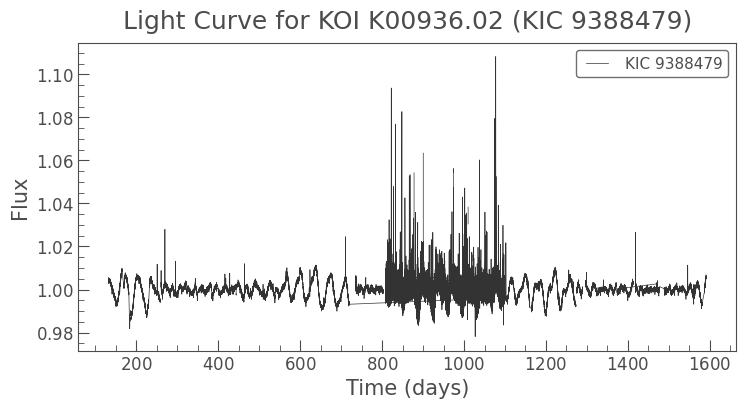

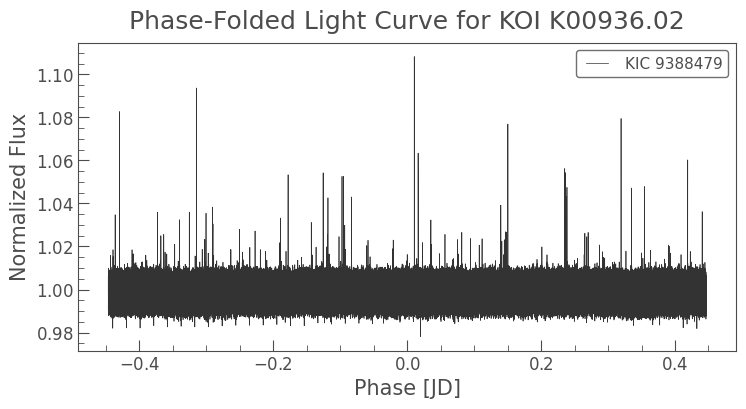

In [ ]:
# Select a sample CONFIRMED exoplanet candidate
koi_sample = koi_table[koi_table["koi_disposition"] == "CONFIRMED"].iloc[0]

# Extract Kepler ID, KOI Name, and Orbital Period
kepid = koi_sample["kepid"]
koi_name = koi_sample["kepoi_name"]
koi_period = koi_sample["koi_period"]

# Download and analyze the light curve
lc = download_and_plot_lightcurve(kepid, koi_name, koi_period)

<Axes: title={'center': 'Cleaned Light Curve'}, xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

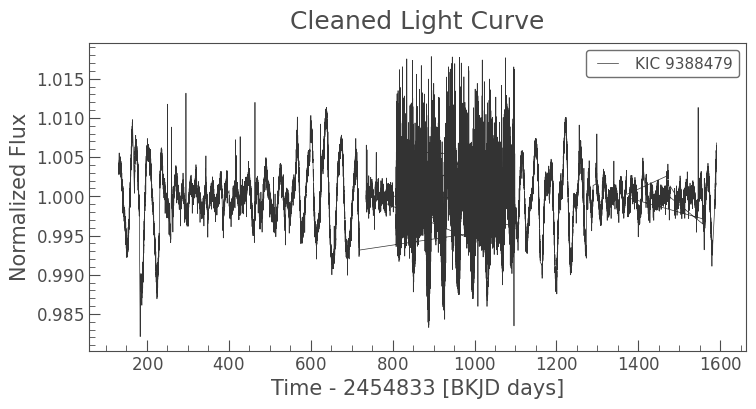

In [ ]:
lc_clean = lc.remove_outliers(sigma=5)  # Remove extreme values (5-sigma clipping)
lc_clean.plot(title="Cleaned Light Curve")

Detected Period: 35.969 days


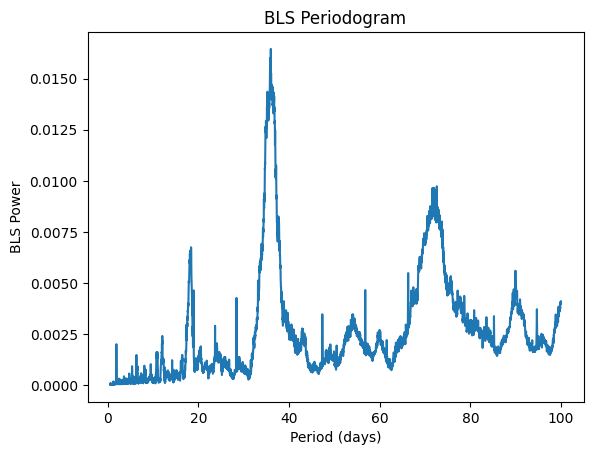

In [ ]:
from astropy.timeseries import BoxLeastSquares
import matplotlib.pyplot as plt

# Define the transit search
bls = BoxLeastSquares(lc_clean.time, lc_clean.flux)

# Compute periodogram over a range of periods (0.5 to 100 days)
periods = np.linspace(0.5, 100, 5000)
bls_power = bls.power(periods, duration=0.1)

# Find the best period (highest power)
best_period = periods[np.argmax(bls_power.power)]
print(f"Detected Period: {best_period:.3f} days")

# Plot the BLS periodogram
plt.plot(periods, bls_power.power)
plt.xlabel("Period (days)")
plt.ylabel("BLS Power")
plt.title("BLS Periodogram")
plt.show()

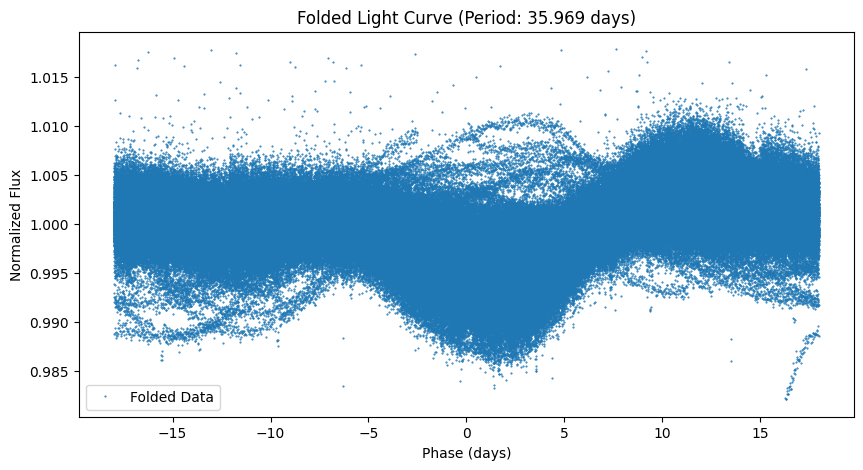

In [ ]:
# Fold the light curve using the detected period
folded_lc = lc_clean.fold(period=best_period)

# Convert TimeDelta to float values for plotting
time_values = folded_lc.time.value  # Convert TimeDelta to phase values (floats)

# Plot the folded light curve
plt.figure(figsize=(10, 5))
plt.plot(time_values, folded_lc.flux, '.', markersize=1, label="Folded Data")
plt.xlabel("Phase (days)")
plt.ylabel("Normalized Flux")
plt.title(f"Folded Light Curve (Period: {best_period:.3f} days)")
plt.legend()
plt.show()

In [ ]:
# Find planets with similar radii
similar_planets = koi_table[(koi_table["koi_prad"] > 1) & (koi_table["koi_prad"] < 2)]
print(similar_planets[["kepoi_name", "koi_prad", "koi_period"]])

     kepoi_name  koi_prad  koi_period
0     K00936.02      1.47    0.893048
4     K00938.02      1.28    1.045632
5     K00938.03      1.61    5.714420
6     K00939.01      1.54    3.388008
7     K00939.02      1.54    5.839061
...         ...       ...         ...
3855  K00665.02      1.17    1.611881
3856  K00665.03      1.11    3.071563
3861  K00670.01      1.77    9.489383
3862  K00671.01      1.43    4.228677
3863  K00671.02      1.23    7.466408

[1339 rows x 3 columns]


#Pruebas con otros planetas.
Dentro de este dataset (q1_18_koi_2025.02.03_04.12.15.csv) Se pueden realizar pruebas de diferentes planetas y sus curvas de luz cambiando el valor dentro de:
#####.iloc[]<----
Este valor se reflejara directamente como la posicion de alguno de los planetas anotados en el csv y se graficará.

Could not resolve "K00955.01" to a sky position.
ERROR:lightkurve.search:Could not resolve "K00955.01" to a sky position.


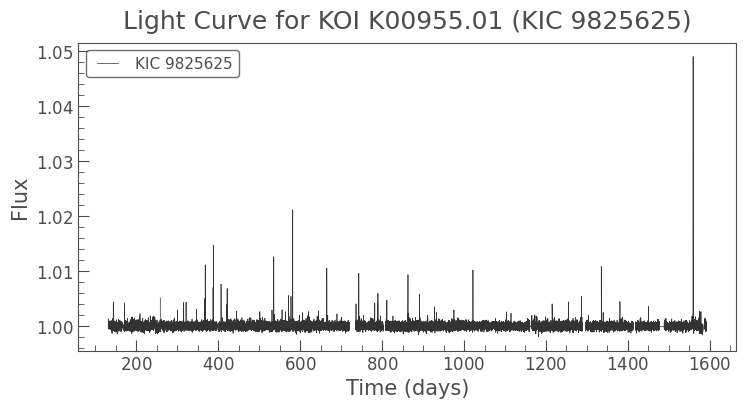

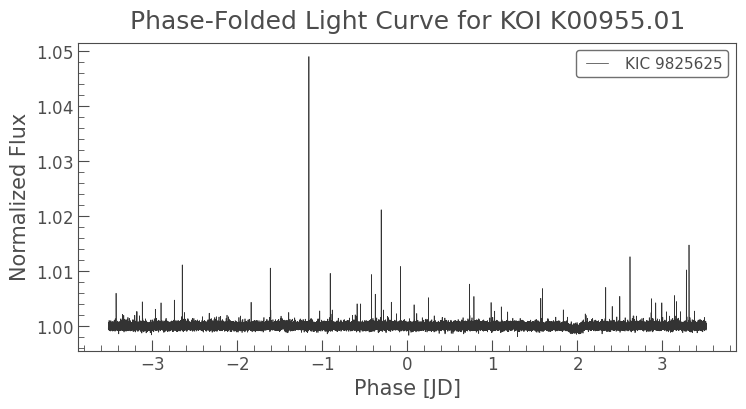

In [ ]:
# Select a sample CONFIRMED exoplanet candidate
koi_sample = koi_table[koi_table["koi_disposition"] == "CONFIRMED"].iloc[90] #<------- Cambiar aqui el valor para cambiar a otro planeta

# Extract Kepler ID, KOI Name, and Orbital Period
kepid = koi_sample["kepid"]
koi_name = koi_sample["kepoi_name"]
koi_period = koi_sample["koi_period"]

# Download and analyze the light curve
lc = download_and_plot_lightcurve(kepid, koi_name, koi_period)


<Axes: title={'center': 'Cleaned Light Curve'}, xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

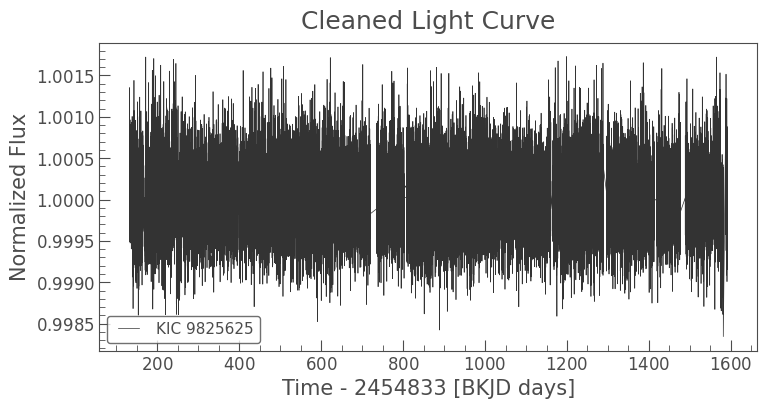

In [ ]:
lc_clean = lc.remove_outliers(sigma=5)  # Remove extreme values (5-sigma clipping)
lc_clean.plot(title="Cleaned Light Curve")

#2.- Analisis con Keplerstellar_2025.02.03_06.14.34
A continuación el mismo analisis usando otro de los archivos csv subidos en la página de Kaggle.
Este Dataset contiene datos sobre las estrellas observadas por los telescopios Kepler y TESS, incluyendo parámetros fundamentales como su temperatura, luminosidad, radio y metalicidad (composición química).

####Contenido principal:

**Kepler ID (KIC):** Identificador único asignado a cada estrella observada por Kepler.

**Temperatura efectiva (Teff):** Temperatura de la superficie de la estrella (en kelvin).
**Gravedad superficial (log g):** Medida de la fuerza de gravedad en la superficie estelar.

**Radio, masa y metalicidad:** Propiedades físicas clave de la estrella (Metalicidad indica la proporción de elementos más pesados que el hidrógeno y helio).

**Luminosidad y distancia:** Parámetros esenciales para normalizar las curvas de luz y analizar los brillos observados correctamente.


Este tipo de dataset se utiliza para:

* Caracterizar las estrellas anfitrionas de posibles exoplanetas.

* Corregir y calibrar curvas de luz (brillo en el tiempo) para detectar tránsitos planetarios.

In [ ]:
kepler_stellar.head()

,st_delivname,kepid,tm_designation,ra,dec,kepmag,teff,teff_err1,teff_err2,teff_prov,...,mass_err2,dens,dens_err1,dens_err2,prov_sec,nconfp,nkoi,ntce,st_quarters,st_vet_date
0,q1_q17_dr25_supp_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,171.0,-156.0,PHO1,...,-0.4750,0.06246,1.8090,-0.03608,DSEP,0.0,0.0,0.0,NaN,2018-01-06 0
1,q1_q16_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,138.0,-163.0,PHO1,...,-0.4012,0.06246,0.1124,-0.04001,DSEP,0.0,0.0,0.0,1.111111e+16,2013-12-03 0
2,q1_q17_dr24_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,138.0,-163.0,PHO1,...,-0.4010,0.06246,0.1124,-0.04001,DSEP,0.0,0.0,0.0,1.111111e+16,2015-01-15 0
3,q1_q12_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5138,83.0,-83.0,Pinsonneault,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,2013-03-27 0
4,q1_q17_dr25_stellar,757076,2MASS J19240929+3635532,291.03873,36.598129,11.678,5160,171.0,-156.0,PHO1,...,-0.4750,0.06246,1.8090,-0.03608,DSEP,0.0,0.0,0.0,1.111111e+16,2017-03-23 0


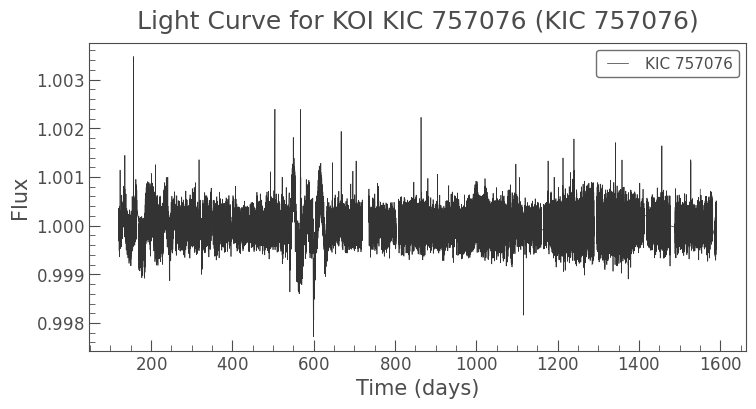

In [ ]:
# Seleccionar una estrella del catálogo kepler_stellar
star_sample = kepler_stellar.iloc[0]  # Cambia el número para ver otra estrella

# Extraer su Kepler ID
kepid = star_sample["kepid"]

# Crear un nombre (opcional) solo para mostrar en el gráfico
star_name = f"KIC {kepid}"

# Descargar y graficar la curva de luz (sin periodo orbital)
lc = download_and_plot_lightcurve(kepid, star_name)


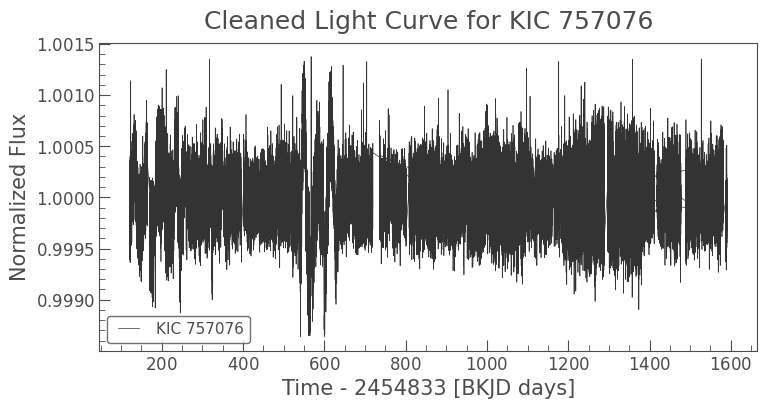

In [ ]:
lc_clean = lc.remove_outliers(sigma=5)
lc_clean.plot(title=f"Cleaned Light Curve for {star_name}")
plt.show()


#3.- Analisis con PS_2025.02.03_05.09.36.csv
Corresponde a un dataset con los planetas confirmados y probabilidades de falso positivo (FPP), Este dataset incluye listados de exoplanetas confirmados y puntuaciones de probabilidad que indican qué tan probable es que un candidato sea un falso positivo. (FPP: significa False Positive Probability)

Contenido principal del dataset:

* **Exoplanetas confirmados:** Planetas verificados detectados por distintas técnicas y misiones espaciales (Kepler, TESS, velocidad radial, imagen directa, etc.).

* **Propiedades orbitales:** Parámetros que describen la órbita del planeta.

* **Propiedades de la estrella anfitriona:** Masa estelar, temperatura, radio e información necesaria para caracterizar el sistema.

* **Probabilidades de falso positivo (FPP):** Puntuaciones que indican la probabilidad de que una señal catalogada como candidato no sea realmente un planeta

Este dataset solo tiene parámetros físicos y orbitales (período, radio, masa, FPP, etc.), Y no los datos de brillo observados por el telescopio.
Por eso, no se puede graficar una curva de luz directamente desde él o al menos no de forma correcta. Solo se puede usar su información para interpretar o comparar con una curva obtenida de otro dataset.


In [ ]:
ps_table.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23


Analizando planeta: 11 UMi b
Periodo orbital: 516.22 días


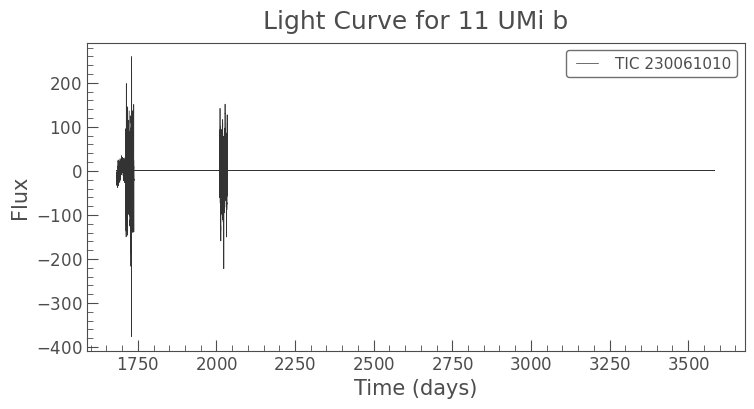

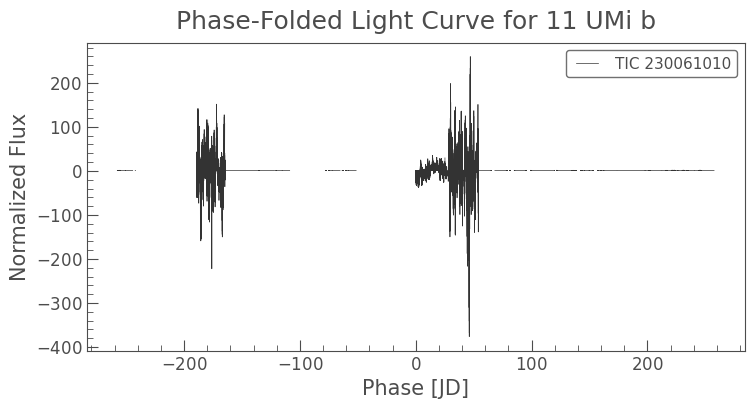

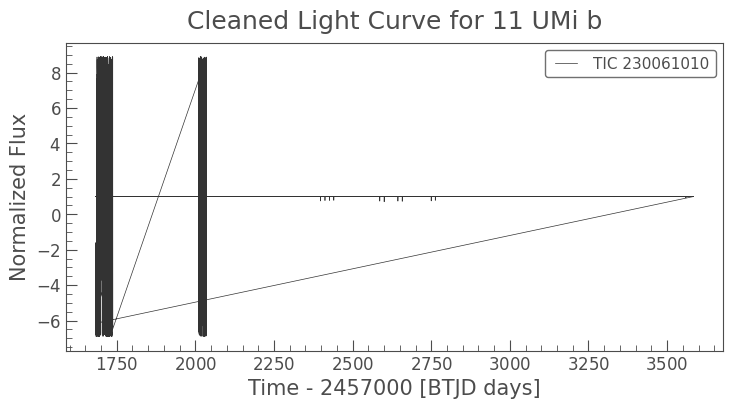

In [ ]:
def download_and_plot_lightcurve(object_name, koi_period=None):
    """
    Descarga y grafica la curva de luz de un exoplaneta o estrella observada por Kepler.
    Si se entrega un periodo orbital, también pliega la curva de luz.
    """
    try:
        # Buscar curvas de luz por nombre del objeto (estrella o planeta)
        search_result = lk.search_lightcurve(object_name)

        if len(search_result) == 0:
            print(f"No se encontró curva de luz para {object_name}")
            return None

        # Descargar todas las curvas disponibles
        lc_collection = search_result.download_all()

        if lc_collection is None:
            print(f"No se pudo descargar la curva de luz de {object_name}")
            return None

        # Unir varios trimestres (si hay más de uno)
        lc = lc_collection.stitch() if len(lc_collection) > 1 else lc_collection[0]

        # Graficar la curva de luz original
        lc.plot(title=f"Light Curve for {object_name}", xlabel="Time (days)", ylabel="Flux")
        plt.show()

        # Si se entrega el periodo orbital, graficar la curva plegada
        if koi_period:
            folded_lc = lc.fold(period=koi_period)
            folded_lc.plot(title=f"Phase-Folded Light Curve for {object_name}")
            plt.show()

        return lc

    except Exception as e:
        print(f"Error procesando {object_name}: {e}")
        return None


# ==========================================================
# Seleccionar un planeta del catálogo ps_table
# ==========================================================
# Ejemplo: elegir el primer planeta (puedes cambiar el número para otro)
planet_sample = ps_table.iloc[5]

# Extraer los datos principales
planet_name = planet_sample["pl_name"]      # Nombre del planeta (ej: "Kepler-10 b")
planet_period = planet_sample["pl_orbper"]  # Periodo orbital (en días, puede ser NaN)

print(f"Analizando planeta: {planet_name}")
print(f"Periodo orbital: {planet_period} días")

lc = download_and_plot_lightcurve(planet_name, planet_period)

if lc is not None:
    lc_clean = lc.remove_outliers(sigma=5)  # Eliminar valores extremos
    lc_clean.plot(title=f"Cleaned Light Curve for {planet_name}")
    plt.show()

#4.- Analisis con Stellarhosts_2025.02.03_06.11.17.csv
Este dataset contiene información sobre las estrellas que tienen exoplanetas confirmados.Es decir, que no incluye todas las estrellas observadas, sino solo aquellas que son “anfitrionas” de planetas detectados.

Este dataset incluye los siguientes datos:

* **Identificador estelar (KIC o TIC):** Código único de cada estrella observada.

* **Radio estelar:** Tamaño de la estrella en radios solares.

* **Temperatura efectiva (Teff):** Temperatura de la superficie estelar (en Kelvin).

* **Metalicidad ([Fe/H]):** Indica la proporción de metales (elementos más pesados que el helio).

* **Masa estelar:** Masa total de la estrella en comparación con el Sol.

Este dataset se usa principalmente para cruzar información con otros archivos, como lo pueden ser tablas de exoplanetas confirmados (PS Table) y tablas de candidatos KOI o TCE y de esa forma, se puede conseguir relacionar cada exoplaneta con su respectiva estrella.

Como tal, este dataset no se le puede registrar la medición de su curva de luz, debido a que estos datos no se registran en este dataset, por lo que los resultados siempre estarán rotos.

In [ ]:
stellar_hosts.head()

,sy_name,hostname,tic_id,sy_snum,sy_pnum,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com,11 Com,TIC 72437047,2,1,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,G8 III,4742.0,100.0,-100.0,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 Com,11 Com,TIC 72437047,2,1,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
2,11 Com,11 Com,TIC 72437047,2,1,<a refstr=MORTIER_ET_AL__2013 href=https://ui....,NaN,4830.0,79.0,-79.0,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
3,11 Com,11 Com,TIC 72437047,2,1,<a refstr=VON_BRAUN_ET_AL__2014 href=https://u...,K0 III,4705.0,24.0,-24.0,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
4,11 Com,11 Com,TIC 72437047,2,1,<a refstr=CANNON___PICKERING_1918 href=https:/...,K0,NaN,NaN,NaN,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848


🔍 Buscando curva de luz para: 14 Her


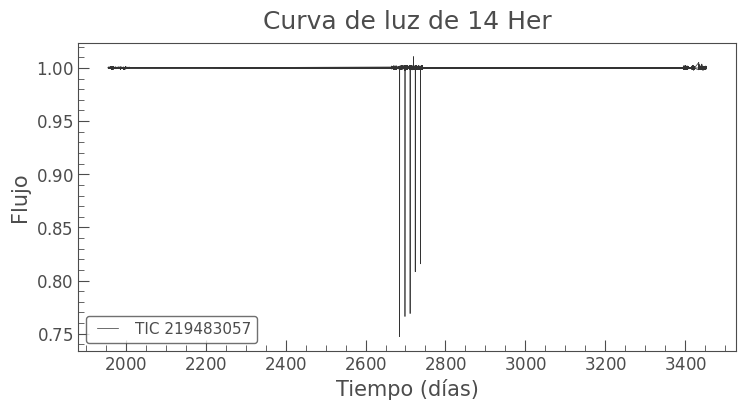

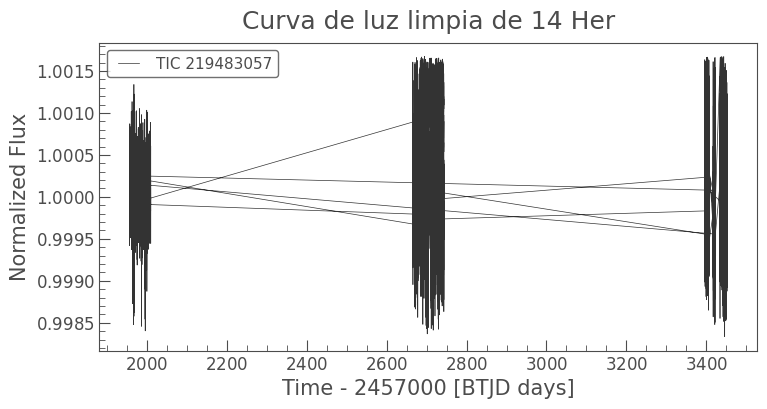

In [ ]:
def download_and_plot_lightcurve_from_stellar_hosts(stellar_hosts, index=0):
    """
    Descarga y grafica la curva de luz de una estrella del DataFrame stellar_hosts.
    Usa el nombre de la estrella ('hostname' o 'sy_name') para buscar datos en Kepler/TESS.
    """
    try:
        # Seleccionamos una estrella del DataFrame
        star = stellar_hosts.iloc[25]

        # Nombre preferido para búsqueda (prioriza 'hostname', si no existe usa 'sy_name')
        star_name = star['hostname'] if 'hostname' in stellar_hosts.columns else star['sy_name']

        print(f"🔍 Buscando curva de luz para: {star_name}")

        # Buscar curva de luz (usa TESS si no está en Kepler)
        search_result = lk.search_lightcurve(star_name)

        if len(search_result) == 0:
            print(f"No se encontró curva de luz para {star_name}")
            return None

        # Descargar todas las curvas disponibles
        lc_collection = search_result.download_all()

        if lc_collection is None:
            print(f"No se pudo descargar la curva de luz para {star_name}")
            return None

        # Combinar si hay varios trimestres (Kepler) o sectores (TESS)
        lc = lc_collection.stitch() if len(lc_collection) > 1 else lc_collection[0]

        # Graficar curva de luz original
        lc.plot(title=f"Curva de luz de {star_name}", xlabel="Tiempo (días)", ylabel="Flujo")
        plt.show()

        # Limpiar valores extremos (opcional)
        lc_clean = lc.remove_outliers(sigma=5)
        lc_clean.plot(title=f"Curva de luz limpia de {star_name}")
        plt.show()

        return lc_clean

    except Exception as e:
        print(f"❌ Error al procesar {star_name}: {e}")
        return None


# === EJEMPLO DE USO ===
# Supongamos que quieres usar la primera estrella del DataFrame:
lc = download_and_plot_lightcurve_from_stellar_hosts(stellar_hosts, index=0)


#5.- Analisis para TOI_2025.02.03_06.18.31
Este Dataset contiene una lista de candidatos a exoplanetas detectados por la misión TESS, conocida como los TOI (TESS Objects of Interest). Los TOIs son el equivalente de los KOIs (Kepler Objects of Interest),solo que fueron descubiertos por TESS en lugar de Kepler. Es decir, es similar y contiene informacion similar a la mision de investigación de otro telescopio.

TESS (Transiting Exoplanet Survey Satellite) es un telescopio espacial que busca exoplanetas midiendo variaciones de brillo en estrellas cercanas.
Cuando una estrella se oscurece un poco de forma periódica, podría indicar que un planeta está transitando frente a ella.
Cada una de esas posibles detecciones se registra como un TOI hasta que sea confirmada o descartada.

Este dataset sirve para identificar nuevos candidatos a exoplanetas descubiertos por TESS.

Como tal, no se pueden medir de forma correcta las curvas de luz de este dataset, pero con un mayor detalle sobre su iluminación si podria ser posible.


In [ ]:
toi_table.head()

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,...,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,...,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,...,NaN,NaN,NaN,0,5.73000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,...,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,...,4.14,0.07,-0.07,0,2.15000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


⚠️ No se encontró TOI confirmado o candidato. Usando el primero disponible.


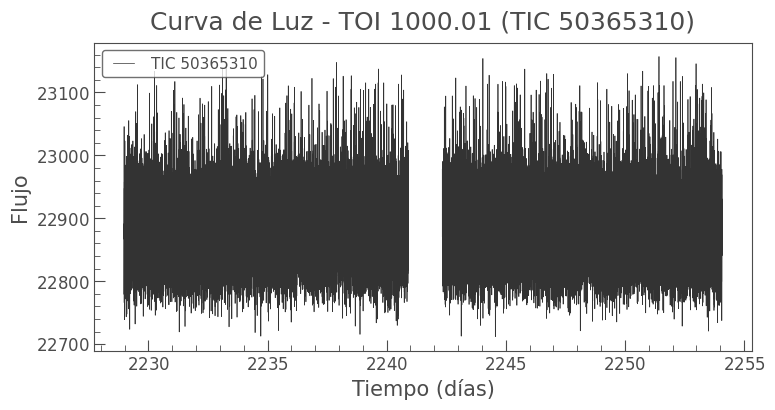

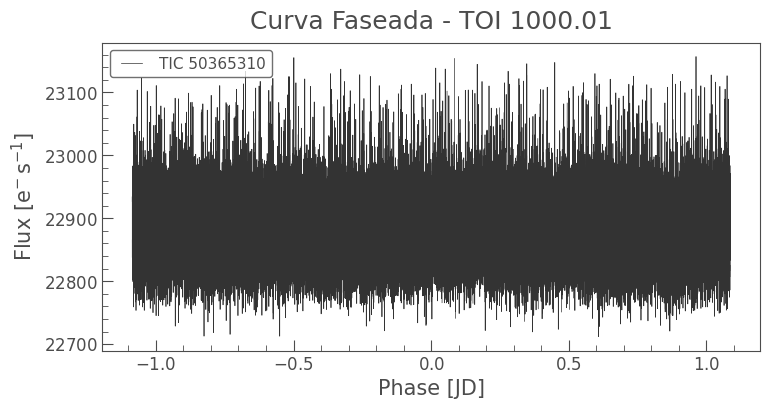

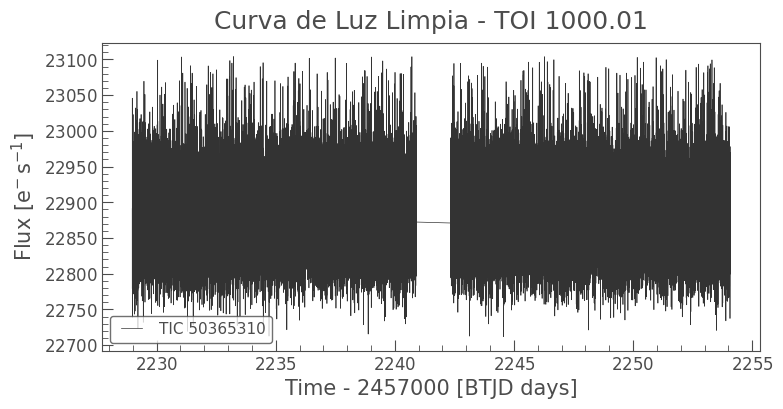

In [ ]:
# --- Función para descargar y graficar curva de luz ---
def download_and_plot_lightcurve(tic_id, toi_name, toi_period=None):
    """
    Descarga y grafica la curva de luz de un TOI usando su TIC ID.
    Si se entrega un periodo orbital, también grafica la curva faseada.
    """
    try:
        # Buscar curvas de luz por TIC ID
        search_result = lk.search_lightcurve(f"TIC {int(tic_id)}", mission='TESS')

        if len(search_result) == 0:
            print(f"No se encontró curva de luz para TOI {toi_name} (TIC {tic_id})")
            return None

        # Descargar todas las curvas disponibles
        lc_collection = search_result.download_all()

        if lc_collection is None or len(lc_collection) == 0:
            print(f"Error al descargar curva de luz para TOI {toi_name} (TIC {tic_id})")
            return None

        # Tomar solo el primer sector para evitar problemas de 'quality'
        lc = lc_collection[0]

        # Graficar la curva de luz cruda
        lc.plot(title=f"Curva de Luz - TOI {toi_name} (TIC {tic_id})", xlabel="Tiempo (días)", ylabel="Flujo")
        plt.show()

        # Graficar curva faseada si se proporciona el periodo orbital
        if toi_period and not pd.isna(toi_period):
            folded_lc = lc.fold(period=toi_period)
            folded_lc.plot(title=f"Curva Faseada - TOI {toi_name}")
            plt.show()

        return lc

    except Exception as e:
        print(f"❌ Error procesando TOI {toi_name} (TIC {tic_id}): {e}")
        return None

# --- Selección automática de un TOI válido ---
valid_states = ["CONFIRMED", "KNOWN PLANET", "CANDIDATE"]

toi_sample = None
for state in valid_states:
    filtered = toi_table[toi_table["tfopwg_disp"] == state]
    if len(filtered) > 0:
        toi_sample = filtered.iloc[0]
        print(f"✅ Usando TOI con estado '{state}'")
        break

# Si no se encontró ninguno, usar el primero disponible
if toi_sample is None:
    toi_sample = toi_table.iloc[0]
    print("⚠️ No se encontró TOI confirmado o candidato. Usando el primero disponible.")

# --- Extraer información ---
tic_id = toi_sample["tid"]
toi_name = toi_sample["toi"]
toi_period = toi_sample["pl_orbper"]

# --- Descargar y analizar la curva de luz ---
lc = download_and_plot_lightcurve(tic_id, toi_name, toi_period)

# --- Limpiar valores extremos y graficar ---
if lc is not None:
    lc_clean = lc.remove_outliers(sigma=5)
    lc_clean.plot(title=f"Curva de Luz Limpia - TOI {toi_name}")
    plt.show()

#6.- analisis con q1_q17_dr25_tce_2025.02.03_04.32.18
Este dataset tiene los valores de TCE, Un TCE (Threshold Crossing Event) es una señal detectada en la curva de luz de una estrella que parece un tránsito planetario, pero aún no ha sido confirmada. Es decir, son todas las bajadas de brillo sospechosas que el algoritmo de Kepler detectó antes de decidir si eran un planeta real, un falso positivo o simple ruido.

Este dataset contiene todas las detecciones automáticas de Kepler entre los trimestres Q1 a Q17 (esos valores corresponden a todo el tiempo que observó el telescopio). Además, este dataset es el paso previo a la clasificación KOI (Kepler Objects of Interest).
Por lo tanto, hay señales verdaderas, falsas y ruidosas mezcladas.

Este dataset no puede medir la curva de luz, pero si obtuviera informacion de el dataset con los TCE, podría realizar curvas de luz.

In [ ]:
tce_table.head()

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err
0,2304168,2,0,431.719000,0.011803,219.298,0.018384,0.9308,0.03871,13.220,...,494.0,104.0,14.09,11.85,7221.0,327.0,3.67,0.49,3.332,1.718
1,2304235,1,0,0.570607,0.000006,132.049,0.000699,0.9000,0.26870,1.160,...,0.0,-1.0,0.00,-1.00,4896.0,172.0,2.12,0.56,26.320,17.390
2,2304566,1,0,0.689480,0.000048,131.833,0.019838,0.3085,45.49000,5.236,...,0.0,-1.0,0.00,-1.00,7059.0,269.0,3.29,0.43,5.894,2.825
3,2304320,1,0,16.540800,0.000043,133.952,0.002193,0.8848,0.22350,2.715,...,570.0,16.6,24.93,2.91,5064.0,101.0,4.57,0.05,0.769,0.049
4,2303365,2,0,0.520697,0.000009,132.003,0.000916,0.9008,0.41550,1.035,...,0.0,-1.0,0.00,-1.00,7517.0,339.0,3.64,0.46,3.603,1.762


In [ ]:
# --- Función para descargar y graficar la curva de luz ---
def download_and_plot_lightcurve(kepid, tce_name, tce_period=None):
    """
    Descarga y grafica la curva de luz de un TCE usando su Kepler ID.
    Si se entrega un periodo orbital, también grafica la curva faseada.
    """
    try:
        # Buscar curvas de luz por Kepler ID
        search_result = lk.search_lightcurve(f"KIC {kepid}")

        if len(search_result) == 0:
            print(f"No se encontró curva de luz para TCE {tce_name} (KIC {kepid})")
            return None

        # Descargar todas las curvas disponibles
        lc_collection = search_result.download_all()

        if lc_collection is None or len(lc_collection) == 0:
            print(f"Error al descargar curva de luz para TCE {tce_name} (KIC {kepid})")
            return None

        # Unir varios trimestres si existen
        lc = lc_collection.stitch() if len(lc_collection) > 1 else lc_collection[0]

        # Graficar curva de luz cruda
        lc.plot(title=f"Curva de Luz - TCE {tce_name} (KIC {kepid})", xlabel="Tiempo (días)", ylabel="Flujo")
        plt.show()

        # Graficar curva faseada si se proporciona periodo
        if tce_period and not pd.isna(tce_period):
            folded_lc = lc.fold(period=tce_period)
            folded_lc.plot(title=f"Curva Faseada - TCE {tce_name}")
            plt.show()

        return lc

    except Exception as e:
        print(f"❌ Error procesando TCE {tce_name} (KIC {kepid}): {e}")
        return None

# --- Selección de un TCE ---
# Aquí puedes elegir el TCE que quieras, por ejemplo el primero:
tce_sample = tce_table.iloc[25]

# --- Extraer información relevante ---
kepid = tce_sample["kepid"]
tce_name = f"TCE {tce_sample['tce_plnt_num']}"  # Nombre genérico del TCE
tce_period = tce_sample["tce_period"]

# --- Descargar y analizar la curva de luz ---
lc = download_and_plot_lightcurve(kepid, tce_name, tce_period)

# --- Limpiar valores extremos y graficar ---
if lc is not None:
    lc_clean = lc.remove_outliers(sigma=5)
    lc_clean.plot(title=f"Curva de Luz Limpia - {tce_name}")
    plt.show()

Could not resolve "KIC 893507.0" to a sky position.
ERROR:lightkurve.search:Could not resolve "KIC 893507.0" to a sky position.


No se encontró curva de luz para TCE TCE 7.0 (KIC 893507.0)


#7.- Analisis para q1_q17_dr25_koifpp_2025.02.03_06.14.34
Este dataset pertenece a la misión Kepler, y contiene estimaciones estadísticas sobre si los candidatos detectados son planetas reales o falsos positivos.
Este dataset contiene información como el ID de la estrella observada, koi_fp_rob el cual corresponde a la probabilidad de falso positivo (False Positive Probability, FPP). Indica qué tan probable es que la señal detectada no sea causada por un planeta (por ejemplo, puede deberse a ruido, eclipses estelares, etc.) y koi_disposition	el cual es la clasificación final del objeto, la cual se puede dividir entre candidato, confirmado o falso positivo.

Para este dataset no se puede realizar el calculo de curvas de luz, debido a que no contiene como tal información necesaria como la que se necesita para calcular las curvas de luz, y solamente puede ofrecer una estadistica de un objeto vario que haya producido dicha señal

Este dataset puede ser usado para buscar candidatos reales antes que querer analizar una curva de Luz.

In [ ]:
fpp_table.head()

,kepid,kepoi_name,fpp_koi_period,fpp_prad,fpp_prob,fpp_score,fpp_delivname,fpp_spec_occrate,fpp_secthresh,fpp_maxrad,...,fpp_smass_err2,fpp_sage,fpp_sage_err1,fpp_sage_err2,fpp_dist,fpp_dist_err1,fpp_dist_err2,fpp_av,fpp_av_err1,fpp_av_err2
0,6508221,K00416.03,9.748,0.82,9.500000e-01,1.0,q1_q17_dr25_koi,0.051,57.0,3.3,...,-0.038,9.30,0.302,-0.436,457.0,14.73,-16.33,0.15,0.085,-0.090
1,6879865,K00417.01,19.193,14.58,8.600000e-01,1.0,q1_q17_dr25_koi,0.059,155.0,0.5,...,-0.086,9.68,0.233,-0.332,1015.0,207.88,-126.61,0.34,0.184,-0.199
2,7975727,K00418.01,22.418,11.87,1.400000e-02,1.0,q1_q17_dr25_koi,0.077,555.0,0.5,...,-0.060,9.82,0.169,-0.412,686.0,119.14,-73.89,0.52,0.094,-0.151
3,8219673,K00419.01,20.131,42.75,9.900000e-01,1.0,q1_q17_dr25_koi,0.001,105.0,0.5,...,-0.054,9.78,0.156,-0.426,869.0,133.31,-85.47,0.07,0.049,-0.046
4,8352537,K00420.01,6.010,3.78,5.700000e-08,1.0,q1_q17_dr25_koi,0.123,43.0,0.5,...,-0.043,9.84,0.257,-0.690,364.0,16.09,-18.47,0.10,0.036,-0.057


Could not resolve "K00421.01" to a sky position.
ERROR:lightkurve.search:Could not resolve "K00421.01" to a sky position.


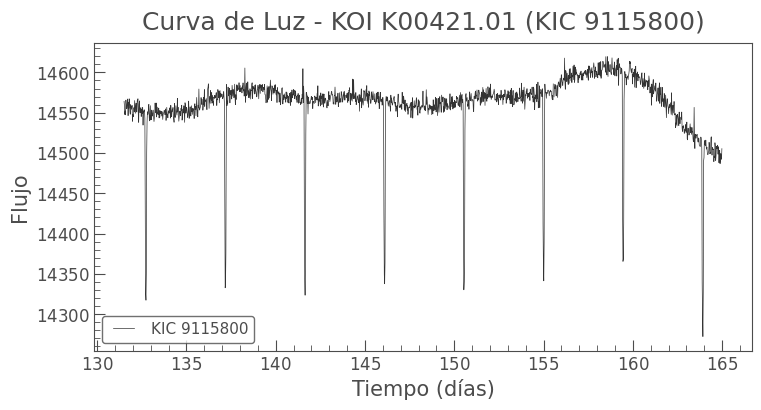

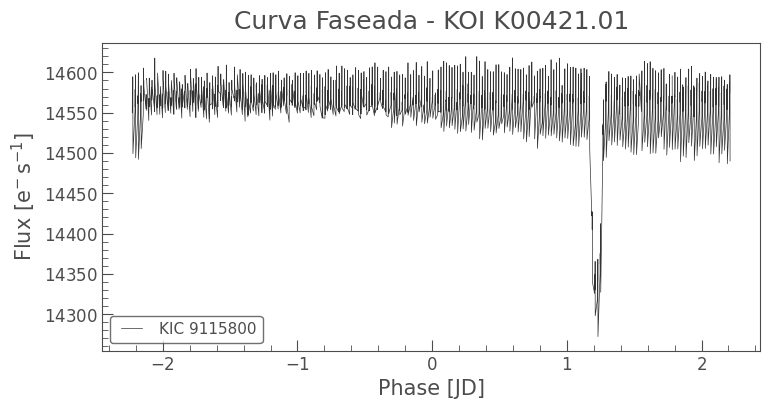

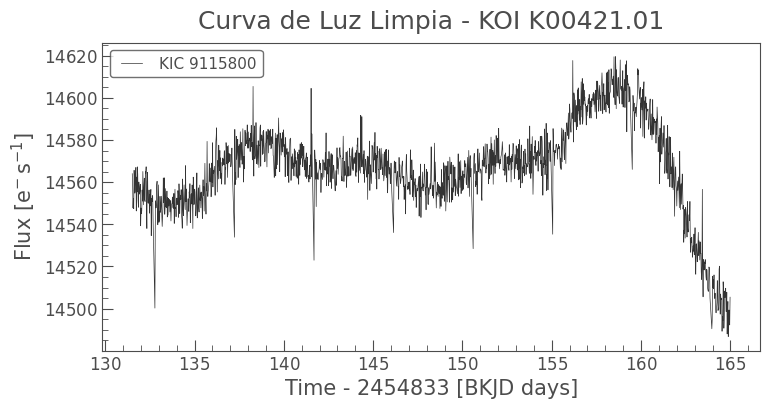

In [ ]:
# --- Función para descargar y graficar curva de luz ---
def download_and_plot_lightcurve(kepid, koi_name, koi_period=None):
    """
    Descarga y grafica la curva de luz de un KOI usando su Kepler ID.
    Si se entrega un periodo orbital, también grafica la curva faseada.
    """
    try:
        # Buscar curvas de luz por KOI name primero
        search_result = lk.search_lightcurve(koi_name)

        # Si no hay resultados, buscar por KIC ID
        if len(search_result) == 0:
            search_result = lk.search_lightcurve(f"KIC {kepid}")

        if len(search_result) == 0:
            print(f"No se encontró curva de luz para KOI {koi_name} (KIC {kepid})")
            return None

        # Descargar todas las curvas disponibles
        lc_collection = search_result.download_all()

        if lc_collection is None or len(lc_collection) == 0:
            print(f"Error al descargar curva de luz para KOI {koi_name} (KIC {kepid})")
            return None

        # Tomar solo el primer trimestre para evitar errores de stitch
        lc = lc_collection[0]

        # Graficar curva de luz cruda
        lc.plot(title=f"Curva de Luz - KOI {koi_name} (KIC {kepid})", xlabel="Tiempo (días)", ylabel="Flujo")
        plt.show()

        # Graficar curva faseada si se proporciona periodo
        if koi_period and not pd.isna(koi_period):
            folded_lc = lc.fold(period=koi_period)
            folded_lc.plot(title=f"Curva Faseada - KOI {koi_name}")
            plt.show()

        return lc

    except Exception as e:
        print(f"❌ Error procesando KOI {koi_name} (KIC {kepid}): {e}")
        return None

# --- Selección de un KOI de fpp_table ---
# Por ejemplo, el primero de la tabla
fpp_sample = fpp_table.iloc[5]

# --- Extraer información ---
kepid = fpp_sample["kepid"]
koi_name = fpp_sample["kepoi_name"]
koi_period = fpp_sample["fpp_koi_period"]

# --- Descargar y analizar la curva de luz ---
lc = download_and_plot_lightcurve(kepid, koi_name, koi_period)

# --- Limpiar valores extremos y graficar ---
if lc is not None:
    lc_clean = lc.remove_outliers(sigma=5)
    lc_clean.plot(title=f"Curva de Luz Limpia - KOI {koi_name}")
    plt.show()